In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dup_file = "/scratch/cqs/ravi_shah_projects/shengq2/20230201_apd_smallrna_hg38/preprocessing/identical/result/CT_01_clipped_identical.fastq.dupcount"
dup = pd.read_csv(dup_file, sep="\t")
dup.head()

,Query,Count,Sequence
0,VH00411:18:AAAMLJYHV:1:1101:45782:2268,5665,ACCAGACCTGGTGGCGGTC
1,VH00411:18:AAAMLJYHV:1:1101:61063:14555,4121,ACCGGACCTGGTGGCGGTC
2,VH00411:18:AAAMLJYHV:1:1101:36106:9747,2301,CACCGACCTGGTGGCGGTC
3,VH00411:18:AAAMLJYHV:1:1101:34592:3499,1670,CCCCGACGGGGGCCCAGGC
4,VH00411:18:AAAMLJYHV:1:1101:26506:25327,1669,CAGGTGACCTGGTGGCGGTC


In [3]:
print(dup.shape)
n_read = dup.shape[0]


(4674869, 3)


In [4]:
dup=dup.head(10000)

In [5]:
dup['SeqLength'] = dup.Sequence.str.len()
dup.head()

,Query,Count,Sequence,SeqLength
0,VH00411:18:AAAMLJYHV:1:1101:45782:2268,5665,ACCAGACCTGGTGGCGGTC,19
1,VH00411:18:AAAMLJYHV:1:1101:61063:14555,4121,ACCGGACCTGGTGGCGGTC,19
2,VH00411:18:AAAMLJYHV:1:1101:36106:9747,2301,CACCGACCTGGTGGCGGTC,19
3,VH00411:18:AAAMLJYHV:1:1101:34592:3499,1670,CCCCGACGGGGGCCCAGGC,19
4,VH00411:18:AAAMLJYHV:1:1101:26506:25327,1669,CAGGTGACCTGGTGGCGGTC,20


In [6]:
dup['logCount'] = np.log2(dup.Count)
dup.head()

,Query,Count,Sequence,SeqLength,logCount
0,VH00411:18:AAAMLJYHV:1:1101:45782:2268,5665,ACCAGACCTGGTGGCGGTC,19,12.467860
1,VH00411:18:AAAMLJYHV:1:1101:61063:14555,4121,ACCGGACCTGGTGGCGGTC,19,12.008779
2,VH00411:18:AAAMLJYHV:1:1101:36106:9747,2301,CACCGACCTGGTGGCGGTC,19,11.168045
3,VH00411:18:AAAMLJYHV:1:1101:34592:3499,1670,CCCCGACGGGGGCCCAGGC,19,10.705632
4,VH00411:18:AAAMLJYHV:1:1101:26506:25327,1669,CAGGTGACCTGGTGGCGGTC,20,10.704768


/data/cqs/softwares/conda_py3_10/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(


<AxesSubplot: xlabel='SeqLength', ylabel='logCount'>

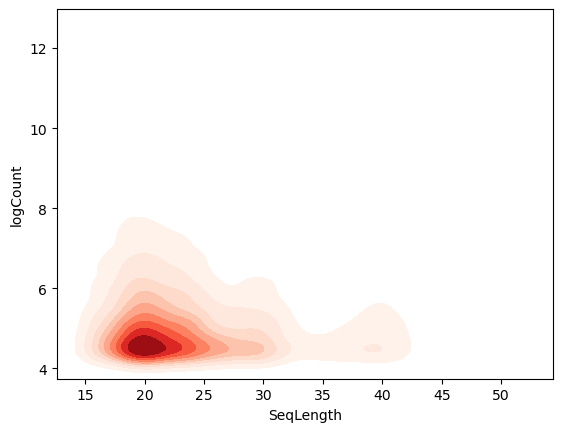

In [7]:
sns.kdeplot(x = dup.SeqLength, y= dup.logCount,
            color='r', fill=True, Label='Dupcount',
            cmap="Reds", thresh=0.05)